# 1. Install Dependencies and Setup

### Import Libraries

This section imports essential libraries required for building and training machine learning models, as well as interacting with the operating system.

- **tensorflow**: 
  - A comprehensive library for machine learning and deep learning.
  - Provides tools for building and training neural networks, handling large datasets, and performing complex numerical computations.

- **os**: 
  - A module for interacting with the operating system.
  - Commonly used for file and directory manipulation, such as navigating the filesystem, creating directories, and handling file paths.
  
### Load TensorFlow and Prepare Environment

Initializes TensorFlow for use in building models, and prepares the environment by setting up paths and directories as needed.

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
!pip list

In [21]:
import tensorflow as tf
import os

# 2. Remove Incompatible Images

- **Main Loop**:
  - **Directory Check**: Ensures only directories are processed.
  - **Image Processing**:
    - Creates paths to image files.
    - Reads and validates images against the allowed extensions.
    - Removes images that don't match the allowed types.

- **Error Handling**:
  - Catches and reports errors during image processing.
  
- **Skipping Non-Directories**:
  - Skips non-directory items and logs the skipped items.

- **Imports**:
  - `cv2`: Used for reading and processing images.
  - `imghdr`: Used to validate image file types.

In [23]:
import cv2
import imghdr

- **Directory Setup**:
  - `data_dir`: Specifies the directory where images are stored.
  - `image_exts`: A list of valid image file extensions.

In [186]:
data_dir = 'data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [188]:
# Loop through each item in the data directory (class folders).
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)  # Create the full path to the current item.

    # Check if the current item is a directory before proceeding.
    if os.path.isdir(class_path):
        
        # Loop through each image file in the current directory (class folder).
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)  # Create the full path to the image.
            
            try:
                img = cv2.imread(image_path)  # Read the image using OpenCV.
                tip = imghdr.what(image_path)  # Determine the file type of the image.
                
                # Check if the image type is not in the list of allowed extensions.
                if tip not in image_exts:
                    print('Image not in ext list {}'.format(image_path))  # Notify if the image has an invalid extension.
                    os.remove(image_path)  # Remove the image if it's not an allowed type.
            
            # Handle exceptions (like issues with reading the image).
            except Exception as e:
                print('Issue with Image {}'.format(image_path))  # Notify if there's an issue with the image.
    
    # If the item is not a directory, skip it and notify.
    else:
        print('Skipping non-directory item: {}'.format(class_path))

Skipping non-directory item: data/.DS_Store


# 3. Load Data

- **Imports**:
  - `numpy (np)`: Used for numerical operations and handling arrays.
  - `matplotlib.pyplot (plt)`: Used for creating plots and displaying images.

- **Load Dataset**:
  - **`tf.keras.utils.image_dataset_from_directory`**: Loads and preprocesses images from the specified directory into a TensorFlow dataset.
  
- **Convert to NumPy Iterator**:
  - **`data.as_numpy_iterator()`**: Converts the TensorFlow dataset into a NumPy iterator for easier data manipulation.
  
- **Retrieve Next Batch**:
  - **`data_iterator.next()`**: Gets the next batch of data from the iterator, which includes images and their labels.

- **Plotting**:
  - **`fig, ax = plt.subplots(ncols=4, figsize=(20,20))`**: Creates a grid of subplots for displaying images.
  - **Loop Through Images**: Iterates through the first 4 images in the batch to display them.
    - **`ax[idx].imshow(img.astype(int))`**: Displays each image on the subplot.
    - **`ax[idx].title.set_text(batch[1][idx])`**: Sets the title of each subplot to the label of the corresponding image.

In [191]:
import numpy as np
from matplotlib import pyplot as plt

In [203]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 196 files belonging to 2 classes.


In [205]:
data_iterator = data.as_numpy_iterator()

In [207]:
batch = data_iterator.next()

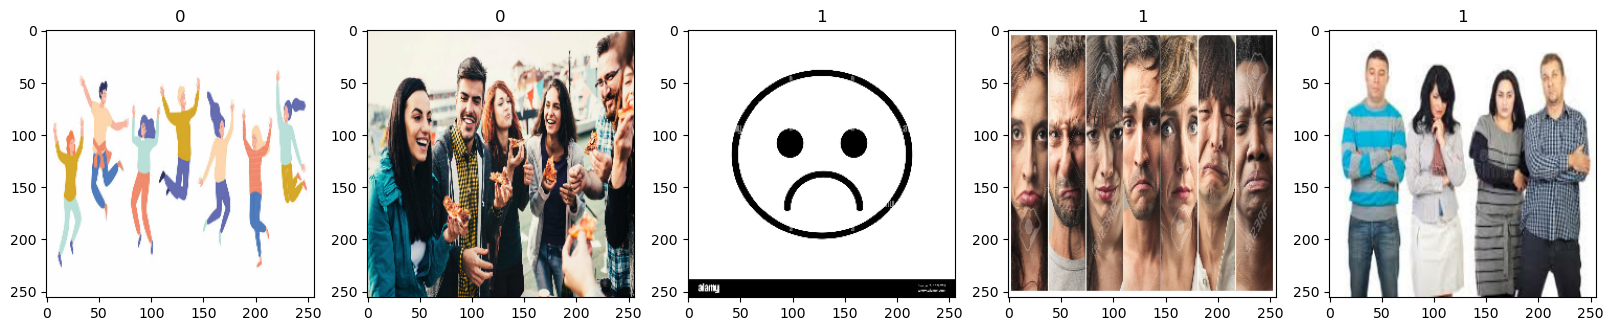

In [211]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

- **Normalization**: Scaling pixel values to [0, 1] ensures consistent input data, which is crucial for stable and efficient training.
- **Training**: Improves convergence speed and performance of neural network training.
- **Bias Reduction**: Helps in mitigating issues related to the range of pixel values and model weights.

In [79]:
scaled_data = data.map(lambda x,y: (x/255, y))

In [91]:
scaled_data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

# 5. Split Data

- **Define Sizes for Each Dataset**:
  - **`train_size = int(len(data) * 0.7)`**:
    - Calculates 70% of the total dataset size for training.
  - **`val_size = int(len(data) * 0.2)`**:
    - Calculates 20% of the total dataset size for validation.
  - **`test_size = int(len(data) * 0.1)`**:
    - Calculates 10% of the total dataset size for testing.

In [259]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

- **Create Training Dataset**:
  - **`train = data.take(train_size)`**:
    - Selects the first `train_size` samples from the dataset for training.

- **Create Validation Dataset**:
  - **`val = data.skip(train_size).take(val_size)`**:
    - **`data.skip(train_size)`**:
      - Skips the first `train_size` samples (used for training).
    - **`data.take(val_size)`**:
      - Takes the next `val_size` samples for validation.

- **Create Test Dataset**:
  - **`test = data.skip(train_size + val_size).take(test_size)`**:
    - **`data.skip(train_size + val_size)`**:
      - Skips the samples used for both training and validation.
    - **`data.take(test_size)`**:
      - Takes the next `test_size` samples for testing.

In [262]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

- **Import Required Modules**:
  - **`from tensorflow.keras.models import Sequential`**:
    - Imports the `Sequential` class for creating a linear stack of layers.
  - **`from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout`**:
    - Imports layers used for building the Convolutional Neural Network (CNN):
      - **`Conv2D`**: Convolutional layer for feature extraction.
      - **`MaxPooling2D`**: Pooling layer for dimensionality reduction.
      - **`Dense`**: Fully connected layer for classification.
      - **`Flatten`**: Flattens the input to one-dimensional for the fully connected layers.
      - **`Dropout`**: (Not used in this code but imported for regularization) Helps to prevent overfitting by randomly setting some neurons to zero during training.

In [266]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [268]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

- **Create the Model**:
  - **`model = Sequential()`**:
    - Initializes a sequential model where layers are added one after another.

In [271]:
model = Sequential()

- **Add Convolutional Layers**:
  - **`model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))`**:
    - **`Conv2D(16, (3,3), 1, activation='relu')`**:
      - Adds a convolutional layer with 16 filters, each of size 3x3.
      - **`activation='relu'`**: Uses ReLU (Rectified Linear Unit) activation function to introduce non-linearity.
      - **`input_shape=(256,256,3)`**: Specifies the shape of the input images (256x256 pixels with 3 color channels).
  - **`model.add(MaxPooling2D())`**:
    - Adds a max pooling layer to reduce the spatial dimensions (height and width) of the feature maps.
  - **`model.add(Conv2D(32, (3,3), 1, activation='relu'))`**:
    - Adds another convolutional layer with 32 filters, each of size 3x3.
  - **`model.add(MaxPooling2D())`**:
    - Adds another max pooling layer to further reduce dimensions.
  - **`model.add(Conv2D(16, (3,3), 1, activation='relu'))`**:
    - Adds a third convolutional layer with 16 filters.
  - **`model.add(MaxPooling2D())`**:
    - Adds another max pooling layer.

In [276]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

- **Flatten and Add Dense Layers**:
  - **`model.add(Flatten())`**:
    - Flattens the 3D output of the last convolutional layer into a 1D array to feed into fully connected layers.
  - **`model.add(Dense(256, activation='relu'))`**:
    - Adds a dense (fully connected) layer with 256 neurons and ReLU activation function.
  - **`model.add(Dense(1, activation='sigmoid'))`**:
    - Adds the final dense layer with 1 neuron and sigmoid activation function for binary classification.

In [279]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

- **Compile the Model**:
  - **`model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])`**:
    - **`'adam'`**: Uses the Adam optimizer for training, which adapts learning rates based on gradients.
    - **`loss=tf.losses.BinaryCrossentropy()`**: Specifies the binary cross-entropy loss function for binary classification tasks.
    - **`metrics=['accuracy']`**: Tracks the accuracy metric during training and evaluation.

In [282]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

- **View Model Summary**:
  - **`model.summary()`**:
    - Prints a summary of the model architecture, including the layers, output shapes, and the number of parameters.

In [285]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,193 (149.19 KB)

 Trainable params: 38,193 (149.19 KB)

 Non-trainable params: 0 (0.00 B)

### How Data Moves Through Layers

1. **Starting Point**:
   - We begin with the raw image data. This is our starting point, or input.

2. **Convolutional Layers**:
   - **First Convolutional Layer**:
     - This layer looks at small patches of the image (like a 3x3 square) and tries to find features (such as edges or textures).
     - The result is a set of “feature maps” that highlight where these features are found in the image.
   - **Subsequent Convolutional Layers**:
     - Each new convolutional layer takes the feature maps from the previous layer and looks for more complex patterns or combinations of features.
     - For example, while the first layer might find edges, a later layer might find shapes or textures.

3. **Pooling Layers**:
   - After convolutional layers, we often use pooling layers.
   - **Max Pooling**:
     - This layer takes the feature maps from the convolutional layers and reduces their size by keeping only the most important values (like the brightest spots in a feature map).
     - It simplifies the data and reduces the number of computations needed in later layers.

4. **Flattening**:
   - **Flatten Layer**:
     - After several convolutional and pooling layers, the data is still in a multi-dimensional format (like a 3D array).
     - Flattening converts this 3D data into a 1D array (like turning a multi-dimensional image into a long list of numbers).

5. **Fully Connected Layers**:
   - **Dense Layers**:
     - After flattening, the data goes into fully connected layers.
     - These layers use the flattened data to make predictions by connecting every number in the list to each neuron in the layer.
     - The final dense layer produces the output, such as a probability score for classification.

### Summary
- **Data Flow**: Information flows from one layer to the next.
  - Each convolutional layer extracts features from the previous layer's output.
  - Pooling layers reduce and simplify the data.
  - Flattening turns complex data into a simple list.
  - Fully connected layers make the final predictions based on the flattened data.

Each layer takes information from the previous layer, processes it, and passes it to the next layer. This sequential process helps the model learn and make predictions from the image data.

# 7. Train

- **`Define Log Directory`**:
  ```python
  logdir = 'logs'

In [290]:
logdir='logs'

- **`tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)`**:
  - **`tf.keras.callbacks.TensorBoard`**: This creates a TensorBoard callback, which is a tool used to monitor and visualize the training process of your model.
  - **`log_dir=logdir`**: Specifies the directory where TensorBoard will save its log files. The `logdir` variable contains the path to this directory (e.g., `'logs'`).
  - The TensorBoard callback records metrics, losses, and other useful information during training, which can be visualized in TensorBoard to help track and analyze the model's performance.

In [293]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

- **`model.fit()`**: Initiates the training of the model.
- **`train`**: The dataset used for training the model.
- **`epochs=20`**: Specifies that the model will train for 20 epochs, meaning it will go through the training data 20 times.
- **`validation_data=val`**: Provides a separate dataset for validation to evaluate the model's performance during training.
- **`callbacks=[tensorboard_callback]`**: Includes the TensorBoard callback to log and visualize the training metrics.

In [296]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 429ms/step - accuracy: 0.5260 - loss: 3.2311 - val_accuracy: 0.6250 - val_loss: 0.6696
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 392ms/step - accuracy: 0.5927 - loss: 0.6820 - val_accuracy: 0.5938 - val_loss: 0.6480
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - accuracy: 0.6719 - loss: 0.6102 - val_accuracy: 0.6562 - val_loss: 0.6716
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 393ms/step - accuracy: 0.7417 - loss: 0.5955 - val_accuracy: 0.7812 - val_loss: 0.5847
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 402ms/step - accuracy: 0.7427 - loss: 0.5396 - val_accuracy: 0.7188 - val_loss: 0.5447
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 371ms/step - accuracy: 0.8177 - loss: 0.4737 - val_accuracy: 0.8750 - val_loss: 0.4030
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 388ms/step - accuracy: 0.8042 - loss: 0.4650 - val_accuracy: 0.7188 - val_loss: 0.6163
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 430ms/step - accuracy: 0.7458 - loss: 0.5387 - val_accuracy: 0.8438 - val_loss:

# 8. Plot Performance

- **`fig = plt.figure()`**:
  - Creates a new figure for plotting. This is like setting up a blank canvas for your graph.
- **`plt.plot(hist.history['loss'], color='teal', label='loss')`**:
  - Plots the training loss over epochs. The color `teal` is used for the training loss line.
  - **`hist.history['loss']`**: Accesses the recorded training loss values from the training history.
- **`plt.plot(hist.history['val_loss'], color='orange', label='val_loss')`**:
  - Plots the validation loss over epochs. The color `orange` is used for the validation loss line.
  - **`hist.history['val_loss']`**: Accesses the recorded validation loss values from the training history.
- **`fig.suptitle('Loss', fontsize=20)`**:
  - Sets the title of the plot to "Loss" with a font size of 20.
- **`plt.legend(loc="upper left")`**:
  - Adds a legend to the plot to distinguish between the training loss and validation loss lines.
  - **`loc="upper left"`**: Positions the legend in the upper left corner of the plot.
- **`plt.show()`**:
  - Displays the plot on the screen.

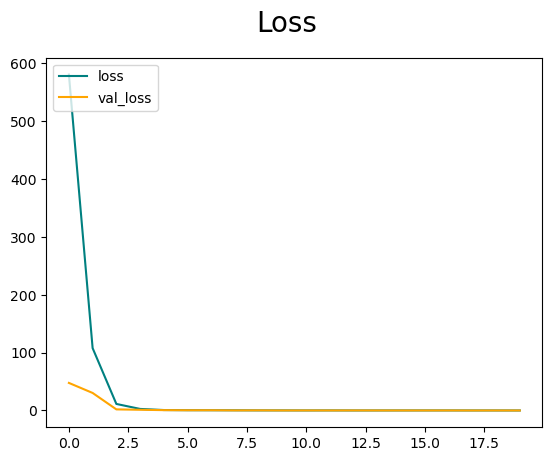

In [129]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

- **`fig = plt.figure()`**:
  - Creates a new figure for plotting. This sets up a blank canvas for your graph.

- **`plt.plot(hist.history['accuracy'], color='teal', label='accuracy')`**:
  - Plots the training accuracy over epochs. The color `teal` is used for the training accuracy line.
  - **`hist.history['accuracy']`**: Accesses the recorded training accuracy values from the training history.

- **`plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')`**:
  - Plots the validation accuracy over epochs. The color `orange` is used for the validation accuracy line.
  - **`hist.history['val_accuracy']`**: Accesses the recorded validation accuracy values from the training history.

- **`fig.suptitle('Accuracy', fontsize=20)`**:
  - Sets the title of the plot to "Accuracy" with a font size of 20.

- **`plt.legend(loc="upper left")`**:
  - Adds a legend to the plot to distinguish between the training accuracy and validation accuracy lines.
  - **`loc="upper left"`**: Positions the legend in the upper left corner of the plot.

- **`plt.show()`**:
  - Displays the plot on the screen.

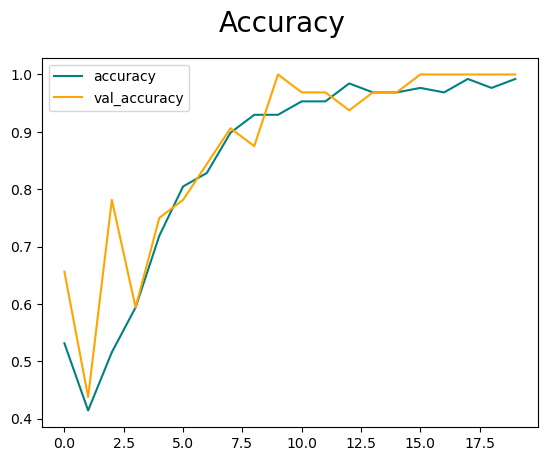

In [131]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

- **`from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy`**:
  - Imports the metrics classes needed to evaluate the model's performance.
  - **`Precision`**: Calculates the precision of the model, which is the ratio of true positives to the sum of true positives and false positives.
  - **`Recall`**: Calculates the recall of the model, which is the ratio of true positives to the sum of true positives and false negatives.
  - **`BinaryAccuracy`**: Calculates the accuracy of the model, which is the ratio of correct predictions to the total number of samples.

In [134]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

- **`pre = Precision()`**:
  - Initializes an instance of the Precision metric.
- **`re = Recall()`**:
  - Initializes an instance of the Recall metric.
- **`acc = BinaryAccuracy()`**:
  - Initializes an instance of the BinaryAccuracy metric.

In [136]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

- **`for batch in test.as_numpy_iterator():`**:
  - Iterates over the test dataset, converting it to a numpy iterator for easy processing.
- **`X, y = batch`**:
  - Extracts input features (`X`) and true labels (`y`) from each batch.
- **`yhat = model.predict(X)`**:
  - Uses the model to generate predictions (`yhat`) for the input features (`X`).
- **`pre.update_state(y, yhat)`**:
  - Updates the precision metric with the true labels (`y`) and predicted labels (`yhat`).
- **`re.update_state(y, yhat)`**:
  - Updates the recall metric with the true labels (`y`) and predicted labels (`yhat`).
- **`acc.update_state(y, yhat)`**:
  - Updates the accuracy metric with the true labels (`y`) and predicted labels (`yhat`).

In [309]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2024-08-10 18:04:46.892770: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


- **`print(pre.result(), re.result(), acc.result())`**:
  - Prints the final precision, recall, and accuracy scores calculated from the test dataset.

In [312]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

- **`import cv2`**:
  - Imports the OpenCV library, which is used for image processing tasks.
- **`img = cv2.imread('happy_test.jpeg')`**:
  - Reads an image file named `happy_test.jpeg` from disk into a numpy array using OpenCV.
- **`plt.imshow(img)`**:
  - Displays the image using matplotlib.
- **`plt.show()`**:
  - Renders and shows the plot on the screen.
- **`resize = tf.image.resize(img, (256,256))`**:
  - Resizes the image to 256x256 pixels using TensorFlow.
- **`plt.imshow(resize.numpy().astype(int))`**:
  - Displays the resized image using matplotlib. The `.numpy().astype(int)` converts the TensorFlow tensor to a numpy array and ensures the pixel values are in integer format.
- **`plt.show()`**:
  - Renders and shows the resized image plot on the screen.
- **`yhat = model.predict(np.expand_dims(resize/255, 0))`**:
  - Predicts the class of the resized image using the trained model. The `resize/255` scales the pixel values to the range [0, 1], and `np.expand_dims(..., 0)` adds a batch dimension to the image.
- **`yhat`**:
  - Displays the predicted output from the model, which indicates the class probability.
- **`if yhat > 0.5:`**:
  - Checks if the predicted probability is greater than 0.5.
- **`print(f'Predicted class is Sad')`**:
  - Prints "Predicted class is Sad" if the predicted probability is greater than 0.5.
- **`else:`**:
  - Executes if the predicted probability is 0.5 or less.
- **`print(f'Predicted class is Happy')`**:
  - Prints "Predicted class is Happy" if the predicted probability is 0.5 or less.

In [143]:
import cv2

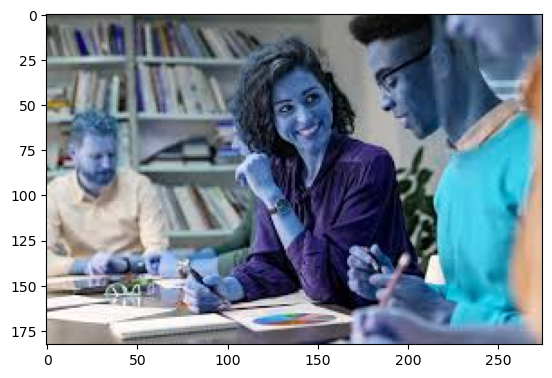

In [147]:
img = cv2.imread('happy_test.jpeg')
plt.imshow(img)
plt.show()

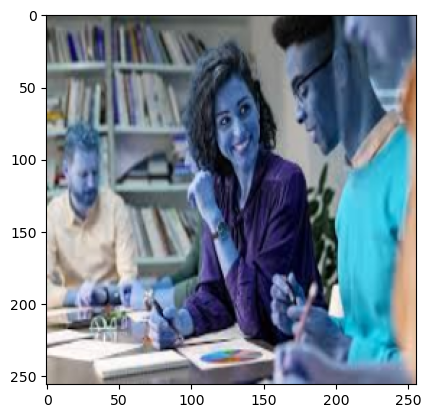

In [149]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [151]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [153]:
yhat

array([[0.4855929]], dtype=float32)

In [155]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

- **`from tensorflow.keras.models import load_model`**:
  - Imports the `load_model` function from TensorFlow’s Keras API, which is used to load a previously saved model.
- **`model.save(os.path.join('models','imageclassifier.h5'))`**:
  - Saves the current model to a file named `imageclassifier.h5` in the `models` directory.
  - **`os.path.join('models', 'imageclassifier.h5')`**: Constructs the path to the model file, ensuring it is stored in the `models` directory.
- **`new_model = load_model('models/imageclassifier.h5')`**:
  - Loads the saved model from the file `imageclassifier.h5` into a new model object named `new_model`.
- **`new_model.predict(np.expand_dims(resize/255, 0))`**:
  - Uses the loaded model to make predictions on the resized image.
  - **`resize/255`**: Scales the pixel values of the resized image to the range [0, 1].
  - **`np.expand_dims(..., 0)`**: Adds a batch dimension to the image, converting it from shape `(256, 256, 3)` to `(1, 256, 256, 3)` for model prediction.

In [158]:
from tensorflow.keras.models import load_model

In [160]:
model.save(os.path.join('models','imageclassifier.h5'))

In [166]:
new_model = load_model('models/imageclassifier.h5')

In [168]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[0.4855929]], dtype=float32)